In [ ]:
from sqlalchemy import create_engine
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta, date, datetime
from time import time
import matplotlib.ticker as tkr
from scipy import stats
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pylab import rcParams
from statsmodels.tsa.seasonal import STL

%matplotlib inline

In [ ]:
!pip install statsmodels --upgrade

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving Global DataBase3.csv to Global DataBase3.csv
Saving Global DataBase2 daily.csv to Global DataBase2 daily.csv


In [ ]:
We gather the data in a csv file named Global DataBase and open it. 
Global DataBase2 daily.csv only contains the datetime per day used to resample the data per day.

In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['Global DataBase2 daily.csv']), index_col='datetime_per_day', parse_dates=True,  dayfirst=True)

df2=pd.read_csv(io.BytesIO(uploaded['Global DataBase.csv']), index_col='datetime', parse_dates=True,  dayfirst=True)


columns = ['Price - PT [€/MWh]','Price - ES [€/MWh]','Actual Consumption (MWh)','Biomass AA','Fossil Gas AA','Fossil Hard Coal AC', 'Hydro Pumped Storage AA','Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA','Hydro Water Reservoir AA', 'Other AA', 'Solar AA','Wind Onshore AA']
for column in columns : 
    df[column] = df2[column].resample("D").mean()

columns = ['Electricity Consumption (MWh)']
for column in columns : 
    df[column] = df2[column].resample("D").sum()
    
df[['Price - PT [€/MWh]']] = df[['Price - PT [€/MWh]']].diff()
df = df.sort_index()

df.dropna()

,Price - PT [€/MWh],Price - ES [€/MWh],Actual Consumption (MWh),Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh)
datetime_per_day,,,,,,,,,,,,,,
2017-01-02,7.46,59.92,4915.58,347.17,2182.42,0.00,226.96,337.83,535.38,59.08,39.38,17.62,3906.83,117974
2017-01-03,6.37,65.25,4915.58,344.04,2582.38,0.00,828.58,441.38,732.88,355.96,40.50,23.08,1877.00,117974
2017-01-04,1.45,66.52,4915.58,339.54,2573.00,0.00,580.71,134.25,653.75,278.62,38.33,36.58,207.08,117974
2017-01-05,0.16,64.48,4915.58,347.21,2172.12,6.33,527.79,97.50,855.75,326.08,41.42,42.33,549.88,117974
2017-01-06,-2.33,64.52,4915.58,352.62,1976.92,7.33,347.50,393.67,539.42,222.92,42.04,69.71,1340.04,117974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08,88.08,535.78,4915.58,385.42,2491.00,0.00,460.42,288.54,550.92,93.25,33.08,254.62,1637.58,117974
2022-03-09,-55.41,478.16,4915.58,378.12,2328.08,0.00,328.58,180.42,370.33,94.79,31.29,236.38,2316.83,117974
2022-03-10,-101.92,376.24,4915.58,378.83,2159.67,0.00,345.79,485.50,404.00,55.58,26.83,277.62,2510.92,117974


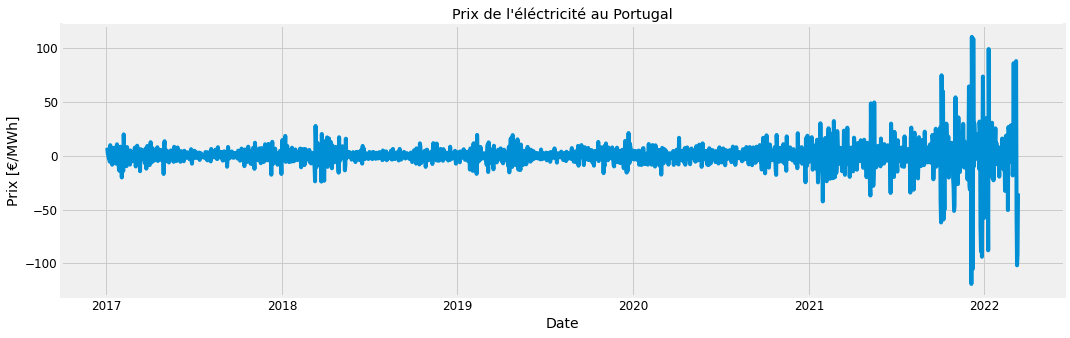

In [ ]:
#Plot Prix PT after data cleaning
plt.figure(figsize=(16,5))
plt.gca().set(title="Prix de l'éléctricité au Portugal", xlabel='Date', ylabel='Prix [€/MWh]')
plt.plot(df.index, df['Price - PT [€/MWh]'])  
plt.show()

In [ ]:
#Handeling global outliers, none in our case
GlobalOutliers =  []
for i in range(0):
    print(df.idxmax()['Price - PT [€/MWh]'])
    GlobalOutliers.append(df.idxmax()['Price - PT [€/MWh]'])
    df.at[df.idxmax()['Price - PT [€/MWh]'], 'Price - PT [€/MWh]'] = np.nan

#Replacing them with the mean of that day
for d in GlobalOutliers:
    sdt = datetime.combine(d, datetime.min.time())
    edt = sdt + timedelta(hours=24)
    df.at[d, 'Price - PT [€/MWh]'] = df[sdt:edt]['Price - PT [€/MWh]'].mean()

In [ ]:
#Handling negative values 
negativeIndex = df.index[df['Price - PT [€/MWh]'] < 0]
for index in (negativeIndex):
    df.at[index, 'Price - PT [€/MWh]']= df.at[index - timedelta(hours=1), 'Price - PT [€/MWh]']

### Adding the year, quarter, month and day features

In [ ]:
df = df.reset_index(drop=False)

df['Time']=pd.to_datetime(df['datetime_per_day']) 
#DatetimeIndex, which is a pandas index that is optimized to index data with dates and times.
df['year'] = df['Time'].apply(lambda x: x.year)
df['quarter'] = df['Time'].apply(lambda x: x.quarter)
df['month'] = df['Time'].apply(lambda x: x.month)
df['day'] = df['Time'].apply(lambda x: x.day)


df=df.loc[:,['Time','Price - PT [€/MWh]','Price - ES [€/MWh]','Actual Consumption (MWh)','Biomass AA','Fossil Gas AA','Fossil Hard Coal AC', 'Hydro Pumped Storage AA','Hydro Pumped Storage AC', 'Hydro Run-of-river and poundage AA','Hydro Water Reservoir AA', 'Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)', 'year', 'quarter','month', 'day']]
df.columns = ['Time','Price - PT [€/MWh]','Price - ES [€/MWh]','Actual Consumption (MWh)','Biomass AA','Fossil Gas AA','Fossil Hard Coal AC', 'Hydro Pumped Storage AA','Hydro Pumped Storage AC', 'Hydro Run-of-river and poundage AA','Hydro Water Reservoir AA', 'Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)', 'year', 'quarter','month', 'day']


In [ ]:
df

,Time,Price - PT [€/MWh],Price - ES [€/MWh],Actual Consumption (MWh),Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh),year,quarter,month,day
0,2017-01-01,51.42,51.05,4875.13,351.65,1138.83,0.00,137.17,402.09,405.70,80.65,40.00,56.61,651.48,112128,2017,1,1,1
1,2017-01-02,58.88,59.92,4915.58,347.17,2182.42,0.00,226.96,337.83,535.38,59.08,39.38,17.62,3906.83,117974,2017,1,1,2
2,2017-01-03,65.25,65.25,4915.58,344.04,2582.38,0.00,828.58,441.38,732.88,355.96,40.50,23.08,1877.00,117974,2017,1,1,3
3,2017-01-04,66.70,66.52,4915.58,339.54,2573.00,0.00,580.71,134.25,653.75,278.62,38.33,36.58,207.08,117974,2017,1,1,4
4,2017-01-05,66.86,64.48,4915.58,347.21,2172.12,6.33,527.79,97.50,855.75,326.08,41.42,42.33,549.88,117974,2017,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,2022-03-08,NaN,535.78,4915.58,385.42,2491.00,0.00,460.42,288.54,550.92,93.25,33.08,254.62,1637.58,117974,2022,1,3,8
1893,2022-03-09,376.24,478.16,4915.58,378.12,2328.08,0.00,328.58,180.42,370.33,94.79,31.29,236.38,2316.83,117974,2022,1,3,9
1894,2022-03-10,376.24,376.24,4915.58,378.83,2159.67,0.00,345.79,485.50,404.00,55.58,26.83,277.62,2510.92,117974,2022,1,3,10
1895,2022-03-11,284.07,284.07,4915.58,375.92,1795.58,0.00,396.71,318.54,500.83,232.12,27.83,133.88,2713.38,117974,2022,1,3,11


## General Stats

In [ ]:
print(df[df.duplicated()].count()['Time'])

0


In [ ]:
df.shape

(1897, 19)

In [ ]:
df.dtypes

Time                                  datetime64[ns]
Price - PT [€/MWh]                           float64
Price - ES [€/MWh]                           float64
Actual Consumption (MWh)                     float64
Biomass AA                                   float64
Fossil Gas AA                                float64
Fossil Hard Coal AC                          float64
Hydro Pumped Storage AA                      float64
Hydro Pumped Storage AC                      float64
Hydro Run-of-river and poundage AA           float64
Hydro Water Reservoir AA                     float64
Other AA                                     float64
Solar AA                                     float64
Wind Onshore AA                              float64
Electricity Consumption (MWh)                  int64
year                                           int64
quarter                                        int64
month                                          int64
day                                           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Time                                1897 non-null   datetime64[ns]
 1   Price - PT [€/MWh]                  1895 non-null   float64       
 2   Price - ES [€/MWh]                  1897 non-null   float64       
 3   Actual Consumption (MWh)            1897 non-null   float64       
 4   Biomass AA                          1897 non-null   float64       
 5   Fossil Gas AA                       1897 non-null   float64       
 6   Fossil Hard Coal AC                 1897 non-null   float64       
 7   Hydro Pumped Storage AA             1897 non-null   float64       
 8   Hydro Pumped Storage AC             1897 non-null   float64       
 9   Hydro Run-of-river and poundage AA  1897 non-null   float64       
 10  Hydro Water Reservoir AA

In [ ]:
df[['Price - PT [€/MWh]','Price - ES [€/MWh]','Actual Consumption (MWh)','Biomass AA','Fossil Gas AA','Fossil Hard Coal AC', 'Hydro Pumped Storage AA','Hydro Pumped Storage AC', 'Hydro Run-of-river and poundage AA','Hydro Water Reservoir AA', 'Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)']].describe()

,Price - PT [€/MWh],Price - ES [€/MWh],Actual Consumption (MWh),Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh)
count,1895.00,1897.00,1897.00,1897.00,1897.00,1897.00,1897.00,1897.00,1897.00,1897.00,1897.00,1897.00,1897.00,1897.00
mean,66.49,66.85,4915.56,332.79,1821.36,6.11,352.94,228.59,687.08,268.59,40.41,134.12,1435.08,117970.92
std,52.58,54.71,0.93,54.23,824.00,6.55,247.09,233.17,522.58,230.93,25.60,66.63,919.97,134.22
min,1.42,1.42,4875.13,95.33,168.25,0.00,0.00,1.62,32.08,10.42,5.71,6.12,46.96,112128.00
25%,42.32,42.01,4915.58,311.67,1129.04,0.00,171.29,45.29,304.62,91.42,29.17,88.29,711.21,117974.00
50%,51.26,51.24,4915.58,338.96,1897.88,5.04,300.17,163.46,520.75,196.08,33.92,125.71,1207.12,117974.00
75%,64.60,64.48,4915.58,375.92,2502.71,9.25,482.04,336.67,916.96,375.67,38.17,172.46,1989.83,117974.00
max,382.00,535.78,4915.58,422.46,3609.46,39.79,1604.17,1466.46,2594.79,1289.62,159.88,361.25,4354.50,117974.00


### Outlier detection using the IQR score

In [ ]:
columns = ['Price - PT [€/MWh]','Price - ES [€/MWh]']
df_pricePT = df['Price - PT [€/MWh]'].dropna()
Q1_G = df_pricePT.quantile(0.25)
Q3_G = df_pricePT.quantile(0.75)
IQR_PT = Q3_G - Q1_G
print(IQR_PT)

22.276666666666664
22.468750000000007


In [ ]:
df_outliers_pricePT = ((df_pricePT < (Q1_G - 1.5 * IQR_PT)) | (df_pricePT > (Q3_G + 1.5 * IQR_PT)))

print("*****************************************************************************")
total = df_outliers_pricePT.shape[0]
outliers = total - df_outliers_pricePT.value_counts()[0]
print(df_outliers_pricePT.value_counts())
percentage = ( outliers / total ) * 100
print("Percentage of outlier values in Price - PT [€/MWh] is : {:.2f}%".format(percentage))

*****************************************************************************
False    1659
True      236
Name: Price - PT [€/MWh], dtype: int64
Percentage of outlier values in Price - PT [€/MWh] is : 12.45%
*****************************************************************************
False    1660
True      237
Name: Price - ES [€/MWh], dtype: int64
Percentage of outlier values in Price - ES [€/MWh] is : 12.49%


### Negative values detection

In [ ]:
df_negative_pricePT = (df['Price - PT [€/MWh]'].dropna() < 0)

print("*****************************************************************************")
total = df_negative_pricePT.shape[0]
outliers = total - df_negative_pricePT.value_counts()[0]
print(df_negative_pricePT.value_counts())
percentage = ( outliers / total ) * 100
print("Percentage of negative values in Price - PT [€/MWh] is : {:.2f}%".format(percentage))

*****************************************************************************
False    1895
Name: Price - PT [€/MWh], dtype: int64
Percentage of negative values in Price - PT [€/MWh] is : 0.00%
*****************************************************************************
False    1897
Name: Price - ES [€/MWh], dtype: int64
Percentage of negative values in Price - ES [€/MWh] is : 0.00%


### Zero values detection

In [ ]:
df.set_index("Time", inplace=True)

In [ ]:
df_zPricePT = (df['Price - PT [€/MWh]']==0)

print(df_zPricePT.count())
print("*****************************************************************************")


df_zPricePTm = df_zPricePT.groupby(df_zPricePT.index.month).size().reset_index(name='counts')

print(df_zPricePTm)
print("*****************************************************************************")

1897
1897
*****************************************************************************
    Time  counts
0      1     186
1      2     169
2      3     167
3      4     150
4      5     155
5      6     150
6      7     155
7      8     155
8      9     150
9     10     155
10    11     150
11    12     155
*****************************************************************************
    Time  counts
0      1     186
1      2     169
2      3     167
3      4     150
4      5     155
5      6     150
6      7     155
7      8     155
8      9     150
9     10     155
10    11     150
11    12     155


In [ ]:
df = df.reset_index(drop=False)

### Feature correlation detection

In [ ]:
correlation=pd.DataFrame(df.corr())
correlation

,Price - PT [€/MWh],Price - ES [€/MWh],Actual Consumption (MWh),Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh),year,quarter,month,day
Price - PT [€/MWh],1.00,1.00,0.01,0.21,0.15,-0.32,-0.02,-0.07,-0.21,-0.11,-0.04,0.36,-0.02,0.01,0.44,0.10,0.10,0.00
Price - ES [€/MWh],1.00,1.00,0.01,0.21,0.16,-0.32,-0.02,-0.08,-0.21,-0.11,-0.05,0.37,-0.02,0.01,0.44,0.09,0.09,-0.00
Actual Consumption (MWh),0.01,0.01,1.00,-0.01,0.02,0.02,0.02,-0.02,0.01,0.02,0.00,0.03,0.02,1.00,0.03,0.03,0.04,0.04
Biomass AA,0.21,0.21,-0.01,1.00,0.07,0.05,0.06,0.06,0.10,0.09,-0.72,0.41,-0.02,-0.01,0.54,-0.06,-0.03,-0.00
Fossil Gas AA,0.15,0.16,0.02,0.07,1.00,-0.30,-0.09,-0.55,-0.22,-0.05,-0.13,0.12,-0.43,0.02,-0.06,0.18,0.16,0.02
Fossil Hard Coal AC,-0.32,-0.32,0.02,0.05,-0.30,1.00,0.14,0.21,0.26,0.18,-0.06,-0.03,0.23,0.02,0.11,-0.02,-0.02,-0.00
Hydro Pumped Storage AA,-0.02,-0.02,0.02,0.06,-0.09,0.14,1.00,-0.10,0.56,0.64,-0.02,-0.22,0.13,0.02,0.12,-0.10,-0.09,-0.02
Hydro Pumped Storage AC,-0.07,-0.08,-0.02,0.06,-0.55,0.21,-0.10,1.00,-0.09,-0.19,0.01,-0.07,0.53,-0.02,0.03,-0.05,-0.05,-0.06
Hydro Run-of-river and poundage AA,-0.21,-0.21,0.01,0.10,-0.22,0.26,0.56,-0.09,1.00,0.78,-0.09,-0.21,0.05,0.01,0.17,-0.36,-0.34,0.03
Hydro Water Reservoir AA,-0.11,-0.11,0.02,0.09,-0.05,0.18,0.64,-0.19,0.78,1.00,-0.08,-0.25,0.03,0.02,0.13,-0.12,-0.11,0.02


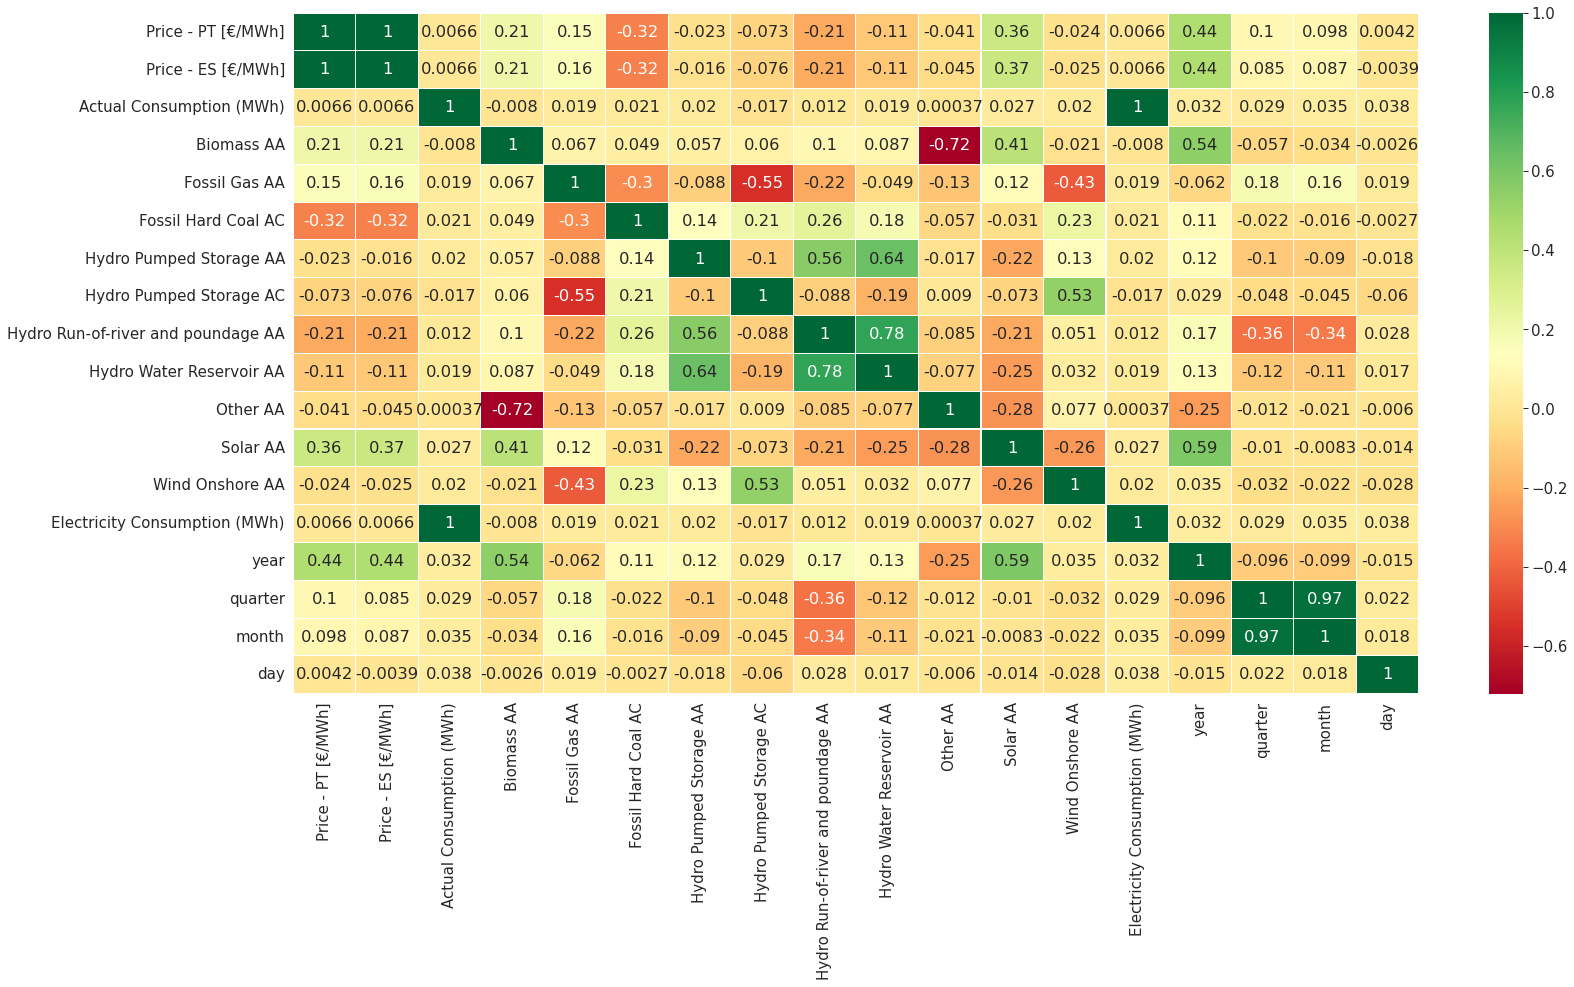

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.7)  
plt.figure(figsize=(24,14))
sns.heatmap(correlation, annot=True, cmap='RdYlGn', linewidths=0.1)
plt.tight_layout()

## Futher plots

### Data changes through time

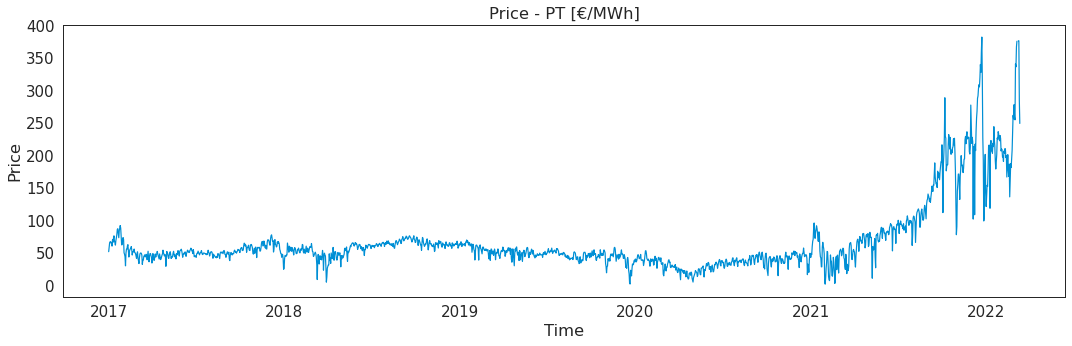

In [ ]:
columns = ['Price - PT [€/MWh]']

df.set_index("Time", inplace=True)

for column in columns:
    plt.figure(figsize=(16,5))
    plt.gca().set(title= column, xlabel='Time', ylabel='Price')
    plt.plot(df.index, df[column]) 
    plt.show()

### Plotting data evolution yearly seperated

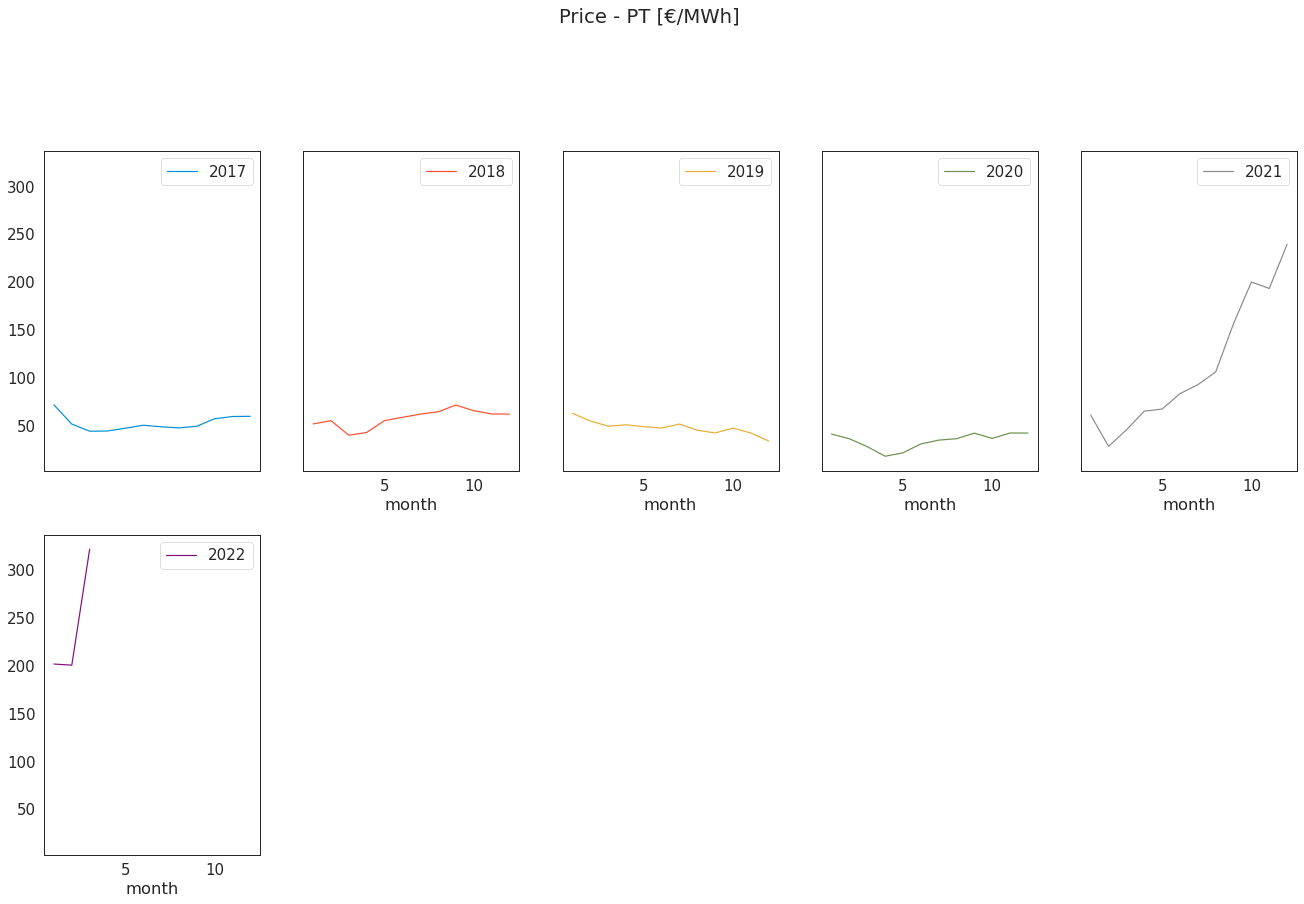

In [ ]:
for column in columns:
    dfPivot = pd.pivot_table(df, values = column, columns = "year", index = "month")
    dfPivot.plot(subplots = True, figsize=(20, 20), layout=(3, 5), sharey=True, title=column);

### Average consumption by year, quarter, month and day

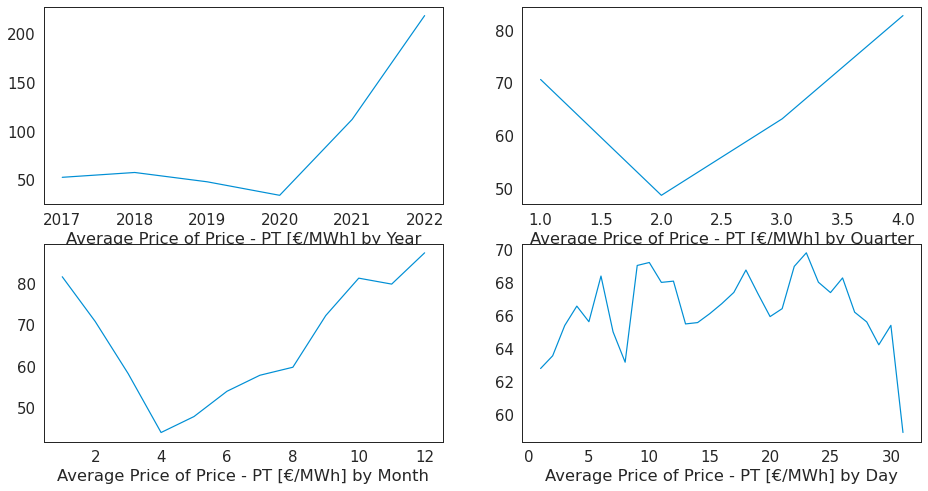

In [ ]:
for column in columns:
    plt.figure(figsize=(14,8))
    plt.subplot(2,2,1)
    df.groupby('year')[column].agg('mean').plot();
    plt.xlabel('Average Price of '+ column +' by Year')

    plt.subplot(2,2,2)
    df.groupby('quarter')[column].agg('mean').plot();
    plt.xlabel('Average Price of '+ column +' by Quarter')

    plt.subplot(2,2,3)
    df.groupby('month')[column].agg('mean').plot();
    plt.xlabel('Average Price of '+ column +' by Month')

    plt.subplot(2,2,4)
    df.groupby('day')[column].agg('mean').plot();
    plt.xlabel('Average Price of '+ column +' by Day');

### Yearly and Quarrtely load in boxplots

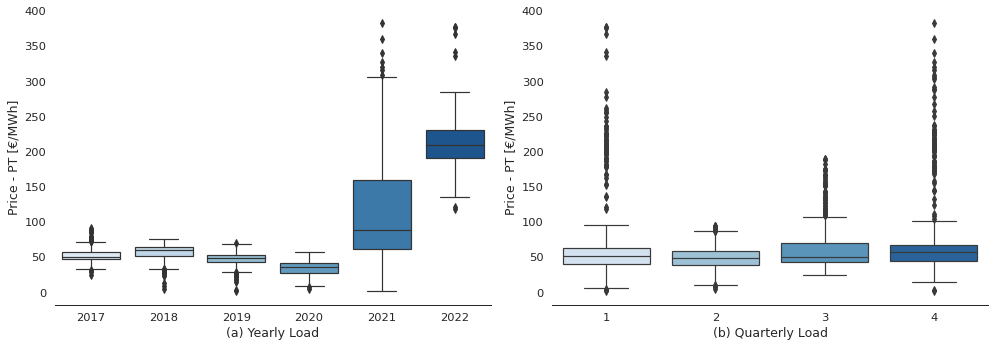

In [ ]:
for column in columns:
    sns.set_style('white')
    sns.set_context("paper", font_scale=1.3)  
    a=plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.subplots_adjust(wspace=0.2)
    sns.boxplot(x="year", y=column, data=df, palette='Blues');
    plt.xlabel('(a) Yearly Load')
    sns.despine(left=True);
    plt.tight_layout() 

    plt.subplot(1,2,2)

    sns.boxplot(x="quarter", y=column, data=df, palette='Blues');
    plt.xlabel('(b) Quarterly Load')
    sns.despine(left=True);
    plt.tight_layout()

### Monthly and Daily load in boxplots

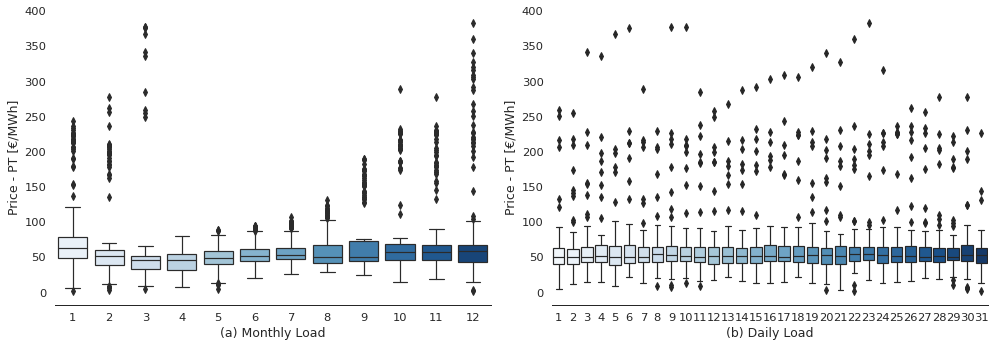

In [ ]:
for column in columns:
    sns.set_style('white')
    sns.set_context("paper", font_scale=1.3)  
    a=plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.subplots_adjust(wspace=0.2)
    sns.boxplot(x="month", y=column, data=df, palette='Blues');
    plt.xlabel('(a) Monthly Load')
    sns.despine(left=True);
    plt.tight_layout() 

    plt.subplot(1,2,2)

    sns.boxplot(x="day", y=column, data=df, palette='Blues');
    plt.xlabel('(b) Daily Load')
    sns.despine(left=True);
    plt.tight_layout()

Text(0, 0.5, 'Consumption')

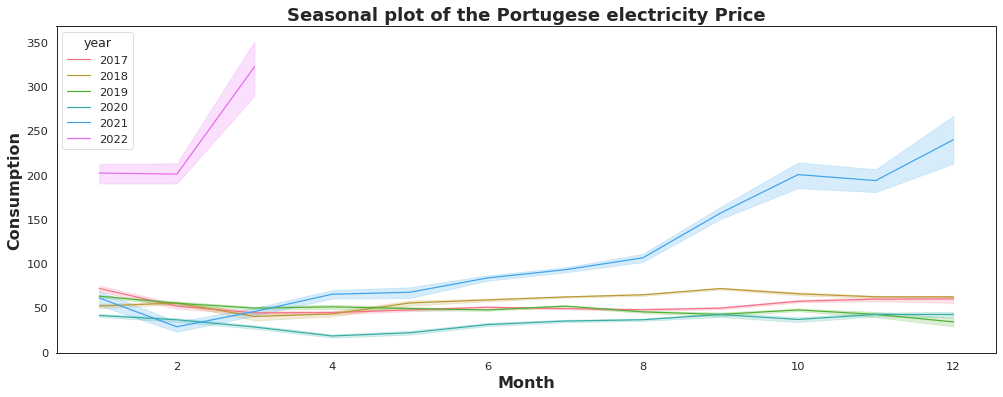

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("husl", 6)
sns.lineplot(df['month'], df["Price - PT [€/MWh]"], hue=df['year'], palette=palette)
ax.set_title('Seasonal plot of the Portugese electricity Price', fontsize = 18, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Consumption', fontsize = 16, fontdict=dict(weight='bold'))

Text(0, 0.5, 'Consumption')

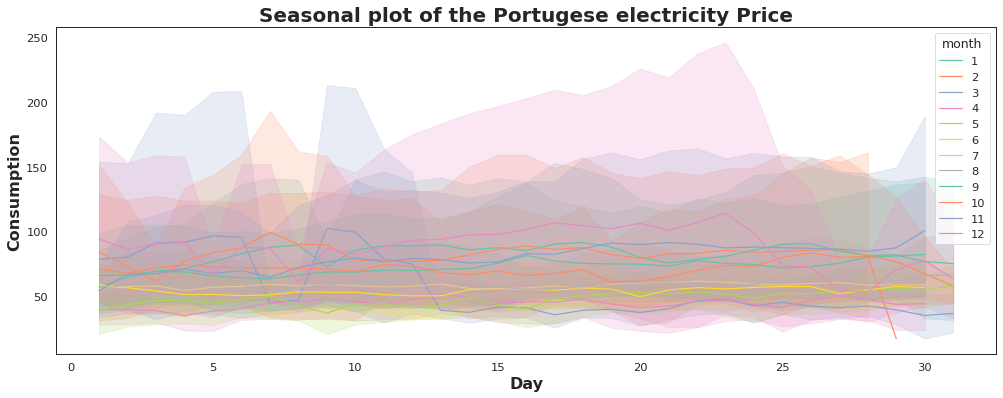

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("Set2", 12)
sns.lineplot(df['day'], df["Price - PT [€/MWh]"], hue=df['month'], palette=palette)
ax.set_title('Seasonal plot of the Portugese electricity Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Consumption', fontsize = 16, fontdict=dict(weight='bold'))

Text(0, 0.5, 'Consumption')

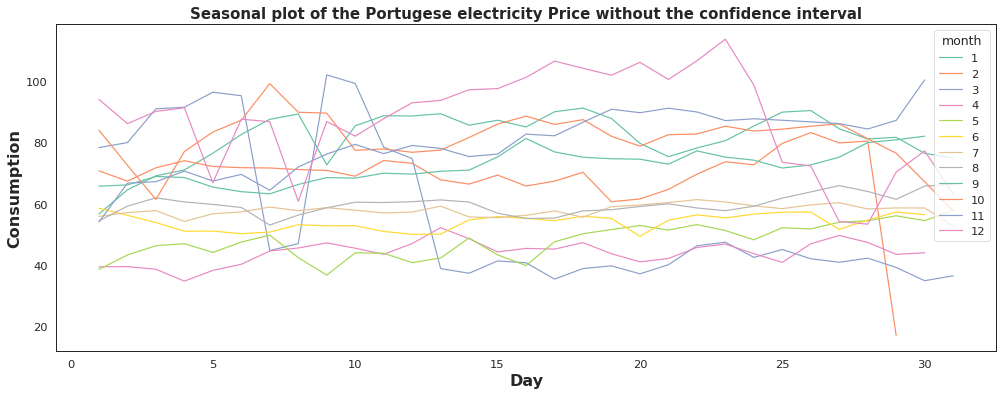

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("Set2", 12)
sns.lineplot(df['day'], df["Price - PT [€/MWh]"], hue=df['month'], palette=palette, ci=None)
ax.set_title('Seasonal plot of the Portugese electricity Price without the confidence interval', fontsize = 15, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Consumption', fontsize = 16, fontdict=dict(weight='bold'))

In [ ]:
dfPricePT1 = df.loc["2017-01-01 00:00:00":"2022-12-03 23:00:00"]["Price - PT [€/MWh]"].dropna()

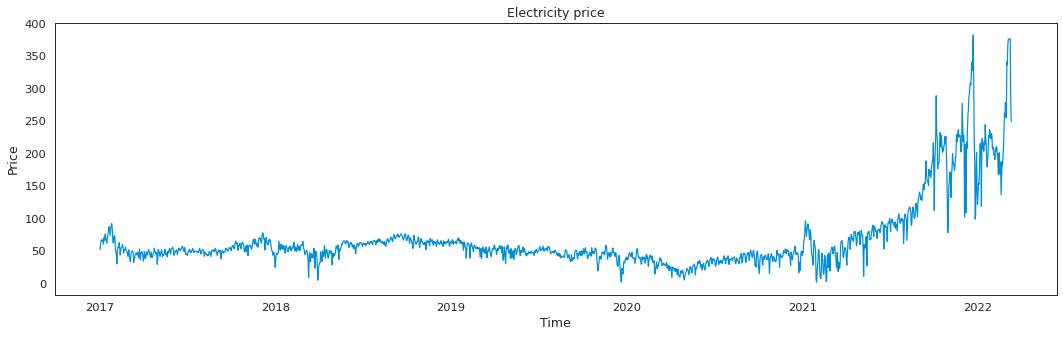

In [ ]:
plt.figure(figsize=(16,5))
plt.gca().set(title= 'Electricity price', xlabel='Time', ylabel='Price')
plt.plot(dfPricePT1.index, dfPricePT1) 
plt.show()

In [ ]:
def perform_adf_test(series, column):
    result = adfuller(series)
    print("************* ADF test for "+ column +" data *************")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [ ]:
#perform augmented Dickey-Fuller test
perform_adf_test(dfPricePT1, "Price - PT [€/MWh]")

************* ADF test for Price - PT [€/MWh] data *************
ADF Statistic: 1.175257
p-value: 0.995810
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
dfPricePT1 = dfPricePT1.diff().dropna()

In [ ]:
#perform augmented Dickey-Fuller test
perform_adf_test(dfPricePT1, "Price - PT [€/MWh]")

************* ADF test for Price - PT [€/MWh] data *************
ADF Statistic: -12.195371
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


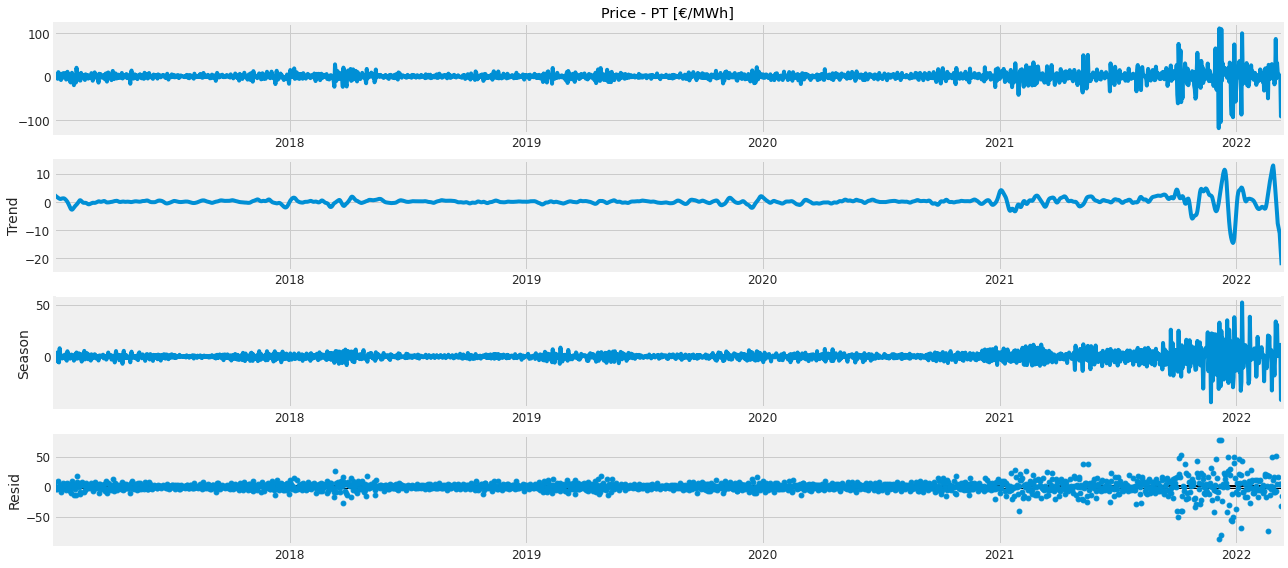

In [ ]:
rcParams['figure.figsize'] = 18, 8
stl = STL(dfPricePT1, period=12)
res = stl.fit()
fig = res.plot()
plt.show()

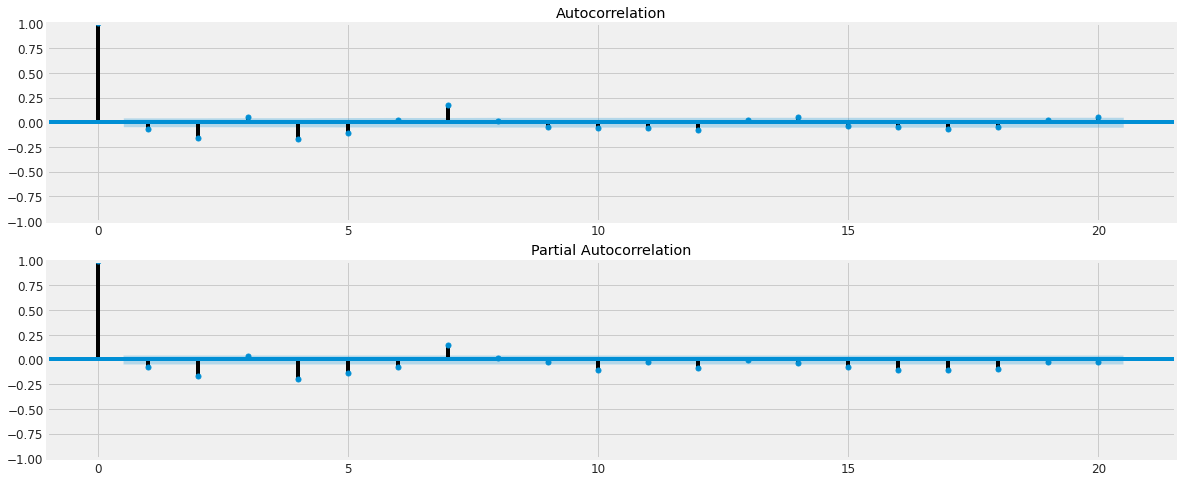

In [ ]:
import statsmodels.api as sm

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(dfPricePT1.values, lags=20, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(dfPricePT1.values, lags=20, ax=ax[1])
plt.show()